In [4]:
# import pandas as pd
import os
from result_analysis import get_number_of_unique_reactions, get_number_of_reactions, \
    run_pca, create_binary_matrix, get_number_of_reactions_by_group, get_dfa_reactions, plot_pca, run_truncatedsvd, run_tsne, plot_tsne

# import matplotlib.pyplot as plt
# import seaborn as sb

DATAPATH = 'C:/Users/BiSBII/Documents/plantdb/reconstruction_results/vvinif2023/results_troppo/RNAseq/'
MODELPATH = os.path.join(DATAPATH, 'reconstructed_models')
SAMPLING = os.path.join(DATAPATH, 'dfa')

In [1]:
import pandas as pd

In [5]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## different medium and biomass for each sample
uptake values for each tissue:

leaf:
- light: -100
- sucrose: -1
- CO2: -10000

berry and stem:
- light: 0
- sucrose: -1
- CO2: 0
- respiration biomass:
    - without chlorophyll A and B, plastoquinol-9 and, alpha-tocopherol in the cofactor reaction

berry mature:
 - reaction for carbohydrates includes anthocyanins and other secondary metabolites

# Models LocalT2

- global threshold lower = 0.1
- global threshold upper = 0.9
- local threshold = 0.75 / 0.5

In [2]:
troppo_res_resp = 'berry_green_stem_fastcore_Local2_0_4_3.csv'
troppo_res_leaf = 'leaf_fastcore_Local2_0_4_3.csv'
troppo_res_berrymature = 'berry_mature_fastcore_Local2_0_4_3.csv'
output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)
output_file_berrym = os.path.join(DATAPATH, troppo_res_berrymature)
df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)
df_berrym = pd.read_csv(output_file_berrym, index_col=0)
df_local2_1 = pd.concat([df_resp, df_leaf, df_berrym])

In [3]:
number_of_reacs, reactions_list = get_number_of_reactions(df_local2_1)
number_of_reacs

,Number of reactions
berry_green_t0,4206
stem_t0,4080
leaf_t0,4277
berry_mature_t0,3889


In [4]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,17
stem_t0,120
leaf_t0,168
berry_mature_t0,50


- global threshold lower = 0.25
- global threshold upper = 0.75
- local threshold = 0.75

In [4]:
troppo_res_stem = 'stem_fastcore_Local2_1_3_3.csv'
troppo_res_berry_green = 'berry_green_fastcore_Local2_1_3_3.csv'
troppo_res_leaf = 'leaf_fastcore_Local2_1_3_3.csv'
troppo_res_berrymature = 'berry_mature_fastcore_Local2_1_3_3.csv'
output_file_stem = os.path.join(DATAPATH, troppo_res_stem)
output_file_berry_green = os.path.join(DATAPATH, troppo_res_berry_green)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)
output_file_berrym = os.path.join(DATAPATH, troppo_res_berrymature)
df_stem = pd.read_csv(output_file_stem, index_col=0)
df_berryg = pd.read_csv(output_file_berry_green, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)
df_berrym = pd.read_csv(output_file_berrym, index_col=0)

df_local2_3 = pd.concat([df_stem, df_berryg, df_leaf, df_berrym])

In [5]:
number_of_reacs, reactions_list = get_number_of_reactions(df_local2_3)
number_of_reacs

,Number of reactions
stem_t0,4210
berry_green_t0,4343
leaf_t0,4365
berry_mature_t0,4098


In [ ]:
all_reacs_no_leaf = []

for key in reactions_list:
    if key != 'leaf_t0':
        all_reacs_no_leaf.extend(reactions_list[key])

all_reacs_no_leaf = set(all_reacs_no_leaf)

diff = set(reactions_list['leaf_t0']).difference(all_reacs_no_leaf)
print(diff)

In [6]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

['RXN-13507__er', 'RXN-15534__cyto', 'RXN-11907__er', 'RXN-8857__cyto', 'RXN-16489__cyto', 'TR2918111__cyto__extr', 'MYO-INOSITOL-2-DEHYDROGENASE-RXN__cyto', 'TR2904581__cyto__extr', 'TR2918288__cyto__extr', 'RXN-1144__er', 'TR2913855__cyto__extr', 'TR2911496__cyto__extr', 'RXN-4304__chlo', 'RXN-4304__cyto', 'TR2904754__cyto__extr', 'RXN-15537__cyto', 'TR2903669__cyto__extr', 'RXN-9314__er', 'RXN-15536__cyto', 'TR2911294__cyto__extr', 'RXN-16344__cyto', 'RXNQT-4335__extr', 'RXN-18670__cyto', 'RXN-12362__cyto', 'TR2913874__cyto__extr', 'TR2911269__cyto__extr', '4.2.1.101-RXN__cyto', 'RXNQT-4336__extr', 'TR2911373__cyto__extr', 'TR2904661__cyto__extr', 'TR2903726__cyto__extr', 'RXN18C3-61__cyto', 'TR2913726__cyto__extr', 'TR2904638__cyto__extr', 'TR2918130__cyto__extr', 'RXN-7759__cyto', 'TR2913701__cyto__extr', 'TR2916002__cyto__extr', 'TR2915886__cyto__extr', 'TR2913928__cyto__extr', 'TR2913758__cyto__extr', 'RXN-16488__cyto', 'RXN-8859__cyto', 'RXN-13504__er', 'RXN-4308__chlo', 'RXN-4

,Unique reactions
stem_t0,97
berry_green_t0,25
leaf_t0,125
berry_mature_t0,21


In [16]:
troppo_res_resp = 'berry_green_stem_berry_mature_fastcore_Local2_1_3_3_same.csv'
troppo_res_leaf = 'leaf_fastcore_Local2_1_3_3.csv'
# troppo_res_berrymature = 'berry_mature_fastcore_Local2_1_3_3_same.csv'
output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)
# output_file_berrym = os.path.join(DATAPATH, troppo_res_berrymature)
df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)
# df_berrym = pd.read_csv(output_file_berrym, index_col=0)
df_local2_3 = pd.concat([df_resp, df_leaf])

In [17]:
number_of_reacs, reactions_list = get_number_of_reactions(df_local2_3)
number_of_reacs

,Number of reactions
berry_green_t0,4347
stem_t0,4212
berry_mature_t0,4104
leaf_t0,4365


In [18]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,25
stem_t0,97
berry_mature_t0,17
leaf_t0,137


# Models Global

- global threshold upper = 0.75

In [8]:
troppo_res_resp = 'berry_green_stem_fastcore_Global_0_3_4.csv'
troppo_res_leaf = 'leaf_fastcore_Global_0_3_4.csv'
troppo_res_berrymature = 'berry_mature_fastcore_Global_0_3_4.csv'
output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)
output_file_berrym = os.path.join(DATAPATH, troppo_res_berrymature)
df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)
df_berrym = pd.read_csv(output_file_berrym, index_col=0)
df_global_1 = pd.concat([df_resp, df_leaf, df_berrym])

In [9]:
number_of_reacs, reactions_list = get_number_of_reactions(df_global_1)
number_of_reacs

,Number of reactions
berry_green_t0,4498
stem_t0,4530
leaf_t0,4569
berry_mature_t0,4352


In [10]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,11
stem_t0,84
leaf_t0,66
berry_mature_t0,52


- global threshold upper = 0.50

In [16]:
troppo_res_resp = 'berry_green_stem_fastcore_Global_0_2_4.csv'
troppo_res_leaf = 'leaf_fastcore_Global_0_2_4.csv'
troppo_res_berrymature = 'berry_mature_fastcore_Global_0_2_4.csv'
output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)
output_file_berrym = os.path.join(DATAPATH, troppo_res_berrymature)
df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)
df_berrym = pd.read_csv(output_file_berrym, index_col=0)
df_global_2 = pd.concat([df_resp, df_leaf, df_berrym])

In [17]:
number_of_reacs, reactions_list = get_number_of_reactions(df_global_2)
number_of_reacs

,Number of reactions
berry_green_t0,3636
stem_t0,3599
leaf_t0,3834
berry_mature_t0,3469


In [18]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,28
stem_t0,245
leaf_t0,209
berry_mature_t0,69


# Same biomass for berries and stem

In [25]:
troppo_res_resp = 'berry_green_stem_berry_mature_fastcore_Local2_0_4_3.csv'
troppo_res_leaf = 'leaf_fastcore_Local2_0_4_3.csv'

output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)

df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)

df_local2_1 = pd.concat([df_resp, df_leaf])

In [26]:
number_of_reacs, reactions_list = get_number_of_reactions(df_local2_1)
number_of_reacs

,Number of reactions
berry_green_t0,3442
stem_t0,3397
berry_mature_t0,3213
leaf_t0,3834


In [27]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,20
stem_t0,226
berry_mature_t0,54
leaf_t0,327


# localt2 [0.25, 0.75, 0.75]

In [28]:
troppo_res_resp = 'berry_green_stem_berry_mature_fastcore_Local2_1_3_3.csv'
troppo_res_leaf = 'leaf_fastcore_Local2_1_3_3.csv'

output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)

df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)

df_local2_3 = pd.concat([df_resp, df_leaf])

In [29]:
number_of_reacs, reactions_list = get_number_of_reactions(df_local2_3)
number_of_reacs

,Number of reactions
berry_green_t0,3521
stem_t0,3472
berry_mature_t0,3314
leaf_t0,3834


In [31]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,26
stem_t0,237
berry_mature_t0,54
leaf_t0,291


- global 075

In [36]:
troppo_res_resp = 'berry_green_stem_berry_mature_fastcore_Global_0_2_4.csv'
troppo_res_leaf = 'leaf_fastcore_Global_0_2_4.csv'

output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)

df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)

df_global_1 = pd.concat([df_resp, df_leaf])

In [37]:
number_of_reacs, reactions_list = get_number_of_reactions(df_global_1)
number_of_reacs

,Number of reactions
berry_green_t0,3698
stem_t0,3722
berry_mature_t0,3503
leaf_t0,3834


In [38]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,42
stem_t0,249
berry_mature_t0,54
leaf_t0,212


# Different approach: filtering strategy with all samples, then model integration with different models / medium for each sample

In [43]:
troppo_res_resp = 'berry_green_stem_fastcore_Local2_0_4_3.csv'
troppo_res_leaf = 'leaf_fastcore_Local2_0_4_3.csv'
troppo_res_berrymature = 'berry_mature_fastcore_Local2_0_4_3.csv'
output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)
output_file_berrym = os.path.join(DATAPATH, troppo_res_berrymature)
df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)
df_berrym = pd.read_csv(output_file_berrym, index_col=0)
df_local2_1 = pd.concat([df_resp, df_leaf, df_berrym])

In [44]:
number_of_reacs, reactions_list = get_number_of_reactions(df_local2_1)
number_of_reacs

,Number of reactions
berry_green_t0,3348
stem_t0,3311
leaf_t0,3552
berry_mature_t0,3085


In [45]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,50
stem_t0,224
leaf_t0,274
berry_mature_t0,101


In [33]:
troppo_res_resp = 'berry_green_stem_fastcore_Local2_1_3_3.csv'
troppo_res_leaf = 'leaf_fastcore_Local2_1_3_3.csv'
troppo_res_berrymature = 'berry_mature_fastcore_Local2_1_3_3.csv'
output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)
output_file_berrym = os.path.join(DATAPATH, troppo_res_berrymature)
df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)
df_berrym = pd.read_csv(output_file_berrym, index_col=0)
df_local2_2 = pd.concat([df_resp, df_leaf, df_berrym])

In [34]:
number_of_reacs, reactions_list = get_number_of_reactions(df_local2_2)
number_of_reacs

,Number of reactions
berry_green_t0,4347
stem_t0,4212
leaf_t0,4365
berry_mature_t0,4119


In [35]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,26
stem_t0,92
leaf_t0,126
berry_mature_t0,60


# GLOBAL

In [51]:
troppo_res_resp = 'berry_green_stem_fastcore_Global_0_3_4.csv'
troppo_res_leaf = 'leaf_fastcore_Global_0_3_4.csv'
troppo_res_berrymature = 'berry_mature_fastcore_Global_0_3_4.csv'
output_file_resp = os.path.join(DATAPATH, troppo_res_resp)
output_file_leaf = os.path.join(DATAPATH, troppo_res_leaf)
output_file_berrym = os.path.join(DATAPATH, troppo_res_berrymature)
df_resp = pd.read_csv(output_file_resp, index_col=0)
df_leaf = pd.read_csv(output_file_leaf, index_col=0)
df_berrym = pd.read_csv(output_file_berrym, index_col=0)
df_global_1 = pd.concat([df_resp, df_leaf, df_berrym])

In [52]:
number_of_reacs, reactions_list = get_number_of_reactions(df_global_1)
number_of_reacs

,Number of reactions
berry_green_t0,3731
stem_t0,3751
leaf_t0,3962
berry_mature_t0,3481


In [53]:
number_of_uniques = get_number_of_unique_reactions(reactions_list)
number_of_uniques

,Unique reactions
berry_green_t0,43
stem_t0,244
leaf_t0,223
berry_mature_t0,61


# PCA for reaction fluxes of LOCAL2 - 1, 3, 3, strategy (0.25, 0.75, 0.75)

In [7]:
sampling_file_local2 = os.path.join(SAMPLING, 'all_sampling.csv')
df_sampling_local2 = pd.read_csv(sampling_file_local2, index_col= 0)


In [8]:
scaler = StandardScaler()
sampling_def_local2_scaled = scaler.fit_transform(df_sampling_local2)
df_sampling_def_local2_scaled = pd.DataFrame(sampling_def_local2_scaled, columns=df_sampling_local2.columns,
                                       index=df_sampling_local2.index)

In [9]:
diff_reacs = get_dfa_reactions('')
# diff_reacs = set(diff_reacs)

In [10]:
df_sampling_def_local2_scaled = df_sampling_def_local2_scaled[diff_reacs]
df_sampling_def_local2_scaled.shape

(40000, 580)

In [11]:
df_pca_sampling_local2, explained_variance_local2, names, loadings = run_pca(n_components=2, data=df_sampling_def_local2_scaled)
df_pca_sampling_local2

,PC 1,PC 2
berry_green_sampling.csv_0,-10.279109,-3.699370
berry_green_sampling.csv_1,-9.505372,-3.733825
berry_green_sampling.csv_2,-8.291422,-6.055025
berry_green_sampling.csv_3,-7.374904,-6.500192
berry_green_sampling.csv_4,-6.105628,-6.464608
...,...,...
stem_sampling.csv_9995,-4.669217,15.274045
stem_sampling.csv_9996,-4.549701,15.104129
stem_sampling.csv_9997,-4.455266,14.978869
stem_sampling.csv_9998,-4.427252,14.855484


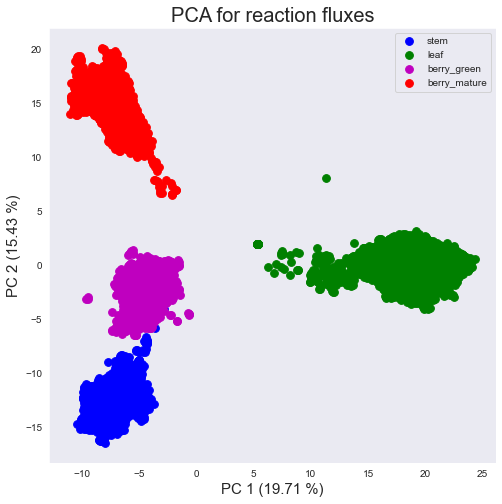

In [34]:
c1 = 'PC 1'
c2 = 'PC 2'

df_pca_sampling_local2['factor'] =  ['berry_green'] * 10000 + ['berry_mature'] * 10000 + ['leaf'] * 10000 + ['stem'] * 10000

plot_pca(data=df_pca_sampling_local2, explained_variance=explained_variance_local2, c1=c1, c2=c2, title='PCA for reaction fluxes',
         name_fig='pca_local2_1_3_3_sampling_diff_new_all_last')

In [23]:
pc1_loadings = loadings.sort_values(by='PC 1', ascending=False)[['PC 1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
pc1_loadings = pc1_loadings.iloc[:30, :]
pc1_loadings

,Attribute,CorrelationWithPC1
0,PLASTOQUINOL--PLASTOCYANIN-REDUCTASE-RXN__chlo,0.978424
1,RXN-15479__chlo,0.978424
2,1.18.1.2-RXN__chlo,0.978167
3,T_Light__chlo,0.977702
4,EX_SUCROSE_drain,0.977614
5,ATPSYN-RXN__chlo,0.976862
6,EX_HCO3_drain,0.975381
7,EX_PROTON_drain,0.975279
8,EX_OXYGEN-MOLECULE_drain,0.974771
9,PSII-RXN__chlo,0.969075


In [24]:
pc2_loadings = loadings.sort_values(by='PC 2', ascending=False)[['PC 2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']
pc2_loadings = pc2_loadings.iloc[:100, :]
pc2_loadings

,Attribute,CorrelationWithPC2
0,TR2918130__cyto__extr,0.875809
1,TR2000009__mito__cyto,0.873577
2,T_DELTA3-ISOPENTENYL-PP__chlo,0.871732
3,IPPISOM-RXN__chlo,0.871731
4,TR2911373__cyto__extr,0.863091
...,...,...
95,DURIDKI-RXN__cyto,0.495147
96,T_LYS__chlo,0.484358
97,T_DGTP__mito,0.481888
98,T_NADP__mito,0.475653


# TSNE

In [25]:
df_tsne_sampling_local2 = run_tsne(n_components=2, data=df_sampling_def_local2_scaled)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


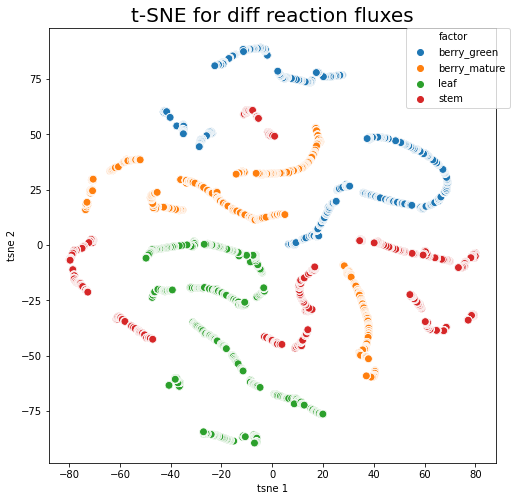

In [64]:
df_tsne_sampling_local2['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_local2, name_fig='tsne_fluxes', title='t-SNE of reaction fluxes')

# TSNE with PCA

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


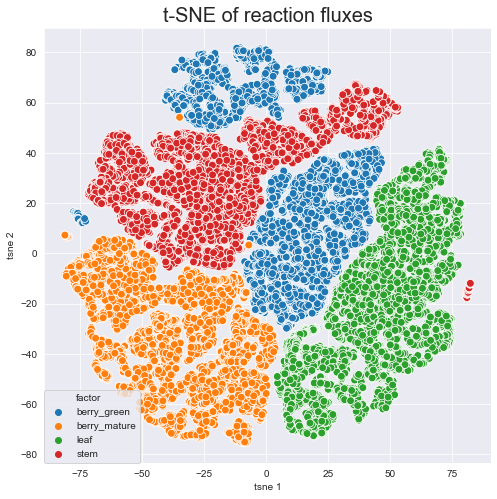

In [12]:
df_tsne_sampling_local2_pca = run_tsne(n_components=2, data=df_pca_sampling_local2)
df_tsne_sampling_local2_pca['factor'] = ['berry_green'] * 10000 + ['berry_mature'] * 10000 + ['leaf'] * 10000 + ['stem'] * 10000
plot_tsne(data=df_tsne_sampling_local2_pca, name_fig='tsne_fluxes_pca_new_all_last', title='t-SNE of reaction fluxes')

# TSNE svd

In [43]:
df_svd_sampling_local2, explained_variance_local2, = run_truncatedsvd(n_components=20, data=df_sampling_def_local2_scaled)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


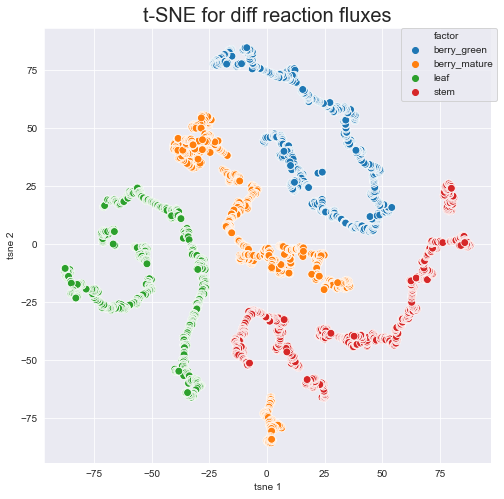

In [44]:
df_tsne_sampling_local2 = run_tsne(n_components=2, data=df_svd_sampling_local2)
df_tsne_sampling_local2['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_local2, name_fig='tsne_fluxes_tsvd', title='t-SNE for diff reaction fluxes')

# GLOBAL

In [30]:
sampling_file_global = os.path.join(SAMPLING, 'all_sampling_new.csv')
df_sampling_global = pd.read_csv(sampling_file_global, index_col= 0)
df_sampling_global

,e-Biomass_vvinif2023__cyto,e-Carbohydrates_vvinif2023__cyto,e-Protein_vvinif2023__cyto,e-Cofactor_vvinif2023__cyto,e-Cellwall_vvinif2023__cyto,e-Lipids_vvinif2023__cyto,e-DNA_vvinif2023__cyto,e-RNA_vvinif2023__cyto,e-FattyAcid_vvinif2023__cyto,Maintenance_vvinif2023__cyto,...,TR2911423__cyto__extr,RXN-18668__cyto,RXN-7653__er,TR2915909__cyto__extr,TR2915983__cyto__extr,RXN-11126__cyto,TR2915829__cyto__extr,TR2904735__cyto__extr,RXN-13503__er,2.1.1.88-RXN__cyto
berry_green_sampling.csv_0,0.000219,0.000055,0.000088,0.000003,0.000055,0.000018,6.576371e-07,8.768495e-07,0.000140,2.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
berry_green_sampling.csv_1,0.000219,0.000055,0.000088,0.000003,0.000055,0.000017,6.558315e-07,8.744420e-07,0.000329,2.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
berry_green_sampling.csv_2,0.000243,0.000061,0.000097,0.000003,0.000061,0.000019,7.289881e-07,9.719841e-07,0.000295,2.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
berry_green_sampling.csv_3,0.000259,0.000065,0.000104,0.000003,0.000065,0.000021,7.756440e-07,1.034192e-06,0.000429,2.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
berry_green_sampling.csv_4,0.000319,0.000080,0.000128,0.000004,0.000080,0.000025,9.560590e-07,1.274745e-06,0.001313,2.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stem_sampling.csv_995,0.016115,0.004834,0.002288,0.000081,0.008541,0.000322,1.611470e-05,3.222940e-05,0.022385,2.0,...,344938.637938,0.0,0.0,72176.079363,119622.322636,0.0,-509203.655622,-520471.818001,0.0,0.0
stem_sampling.csv_996,0.015473,0.004642,0.002197,0.000077,0.008201,0.000309,1.547340e-05,3.094681e-05,0.022172,2.0,...,334273.370622,0.0,0.0,85833.745068,97642.692130,0.0,-507939.579816,-522158.699041,0.0,0.0
stem_sampling.csv_997,0.015903,0.004771,0.002258,0.000080,0.008429,0.000318,1.590284e-05,3.180568e-05,0.021550,2.0,...,368654.497756,0.0,0.0,96831.032559,105350.357151,0.0,-497674.436790,-517814.136025,0.0,0.0
stem_sampling.csv_998,0.015875,0.004762,0.002254,0.000079,0.008414,0.000317,1.587468e-05,3.174935e-05,0.020679,2.0,...,374330.019341,0.0,0.0,114739.196334,104431.065465,0.0,-474286.973291,-489119.145131,0.0,0.0


In [31]:
scaler = StandardScaler()
sampling_global_scaled = scaler.fit_transform(df_sampling_global)
df_sampling_global_scaled = pd.DataFrame(sampling_global_scaled, columns=df_sampling_global.columns,
                                       index=df_sampling_global.index)
df_sampling_global_scaled

,e-Biomass_vvinif2023__cyto,e-Carbohydrates_vvinif2023__cyto,e-Protein_vvinif2023__cyto,e-Cofactor_vvinif2023__cyto,e-Cellwall_vvinif2023__cyto,e-Lipids_vvinif2023__cyto,e-DNA_vvinif2023__cyto,e-RNA_vvinif2023__cyto,e-FattyAcid_vvinif2023__cyto,Maintenance_vvinif2023__cyto,...,TR2911423__cyto__extr,RXN-18668__cyto,RXN-7653__er,TR2915909__cyto__extr,TR2915983__cyto__extr,RXN-11126__cyto,TR2915829__cyto__extr,TR2904735__cyto__extr,RXN-13503__er,2.1.1.88-RXN__cyto
berry_green_sampling.csv_0,-1.089737,-1.122055,-0.866509,-0.894598,-1.107440,-0.817999,-0.856984,-0.930427,-2.285095,0.0,...,-0.437118,0.0,0.0,0.407225,-0.205286,0.0,0.569006,0.569646,0.0,0.0
berry_green_sampling.csv_1,-1.089799,-1.122115,-0.866571,-0.894660,-1.107486,-0.818060,-0.857046,-0.930489,-2.265484,0.0,...,-0.437118,0.0,0.0,0.407225,-0.205286,0.0,0.569006,0.569646,0.0,0.0
berry_green_sampling.csv_2,-1.087295,-1.119690,-0.864065,-0.892136,-1.105610,-0.815591,-0.854547,-0.927947,-2.268984,0.0,...,-0.437118,0.0,0.0,0.407225,-0.205286,0.0,0.569006,0.569646,0.0,0.0
berry_green_sampling.csv_3,-1.085698,-1.118144,-0.862466,-0.890526,-1.104413,-0.814016,-0.852953,-0.926325,-2.255107,0.0,...,-0.437118,0.0,0.0,0.407225,-0.205286,0.0,0.569006,0.569646,0.0,0.0
berry_green_sampling.csv_4,-1.079521,-1.112165,-0.856286,-0.884301,-1.099785,-0.807928,-0.846789,-0.920055,-2.163347,0.0,...,-0.437118,0.0,0.0,0.407225,-0.205286,0.0,0.569006,0.569646,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stem_sampling.csv_995,0.542714,0.778711,-0.302565,-0.222253,1.504715,-0.432332,-0.328886,-0.113174,0.024553,0.0,...,2.674968,0.0,0.0,1.285393,1.603282,0.0,-1.358995,-1.382204,0.0,0.0
stem_sampling.csv_996,0.476854,0.702201,-0.325905,-0.249912,1.400091,-0.448563,-0.350796,-0.146607,0.002390,0.0,...,2.578744,0.0,0.0,1.451567,1.270972,0.0,-1.354209,-1.388530,0.0,0.0
stem_sampling.csv_997,0.520957,0.753435,-0.310276,-0.231390,1.470151,-0.437694,-0.336124,-0.124219,-0.062178,0.0,...,2.888936,0.0,0.0,1.585371,1.387504,0.0,-1.315342,-1.372237,0.0,0.0
stem_sampling.csv_998,0.518064,0.750075,-0.311301,-0.232605,1.465556,-0.438407,-0.337086,-0.125687,-0.152541,0.0,...,2.940141,0.0,0.0,1.803260,1.373606,0.0,-1.226790,-1.264626,0.0,0.0


In [32]:
diff_reacs = get_dfa_reactions('')
df_sampling_global_scaled = df_sampling_global_scaled[diff_reacs]
df_sampling_global_scaled.shape

(4000, 685)

In [33]:
df_pca_sampling_global, explained_variance_global, names, loadings = run_pca(n_components=2, data=df_sampling_global_scaled)
df_pca_sampling_global

,PC 1,PC 2
berry_green_sampling.csv_0,-6.804821,-4.788003
berry_green_sampling.csv_1,-6.455831,-4.769405
berry_green_sampling.csv_2,-6.409607,-4.931844
berry_green_sampling.csv_3,-6.623236,-4.829424
berry_green_sampling.csv_4,-6.590025,-4.865997
...,...,...
stem_sampling.csv_995,-5.827604,17.813926
stem_sampling.csv_996,-5.961957,17.706443
stem_sampling.csv_997,-5.819548,17.643033
stem_sampling.csv_998,-5.771488,17.372134


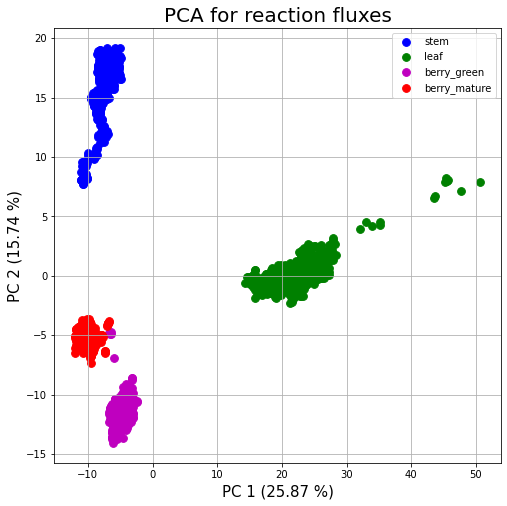

In [34]:
c1 = 'PC 1'
c2 = 'PC 2'

df_pca_sampling_global['factor'] =  ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000

plot_pca(data=df_pca_sampling_global, explained_variance=explained_variance_global, c1=c1, c2=c2, title='PCA for reaction fluxes',
         name_fig='pca_global_3_sampling_diff_error')

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


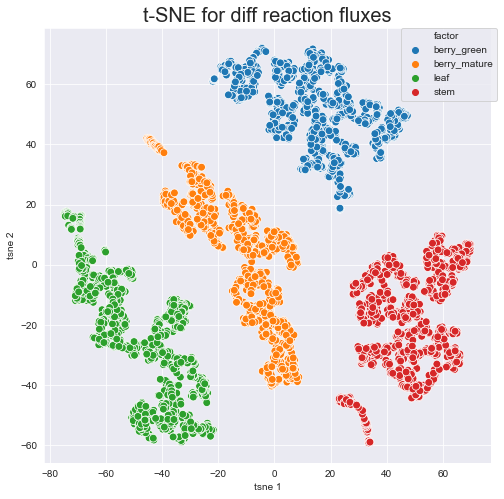

In [14]:
df_tsne_sampling_global_pca = run_tsne(n_components=2, data=df_pca_sampling_global)
df_tsne_sampling_global_pca['factor'] = ['berry_green'] * 1000 + ['berry_mature'] * 1000 + ['leaf'] * 1000 + ['stem'] * 1000
plot_tsne(data=df_tsne_sampling_global_pca, name_fig='tsne_fluxes_pca_global', title='t-SNE for diff reaction fluxes')

# FINAL RESULTS

In [8]:
sampling_file_final= os.path.join(SAMPLING, 'all_sampling.csv')
df_sampling_final = pd.read_csv(sampling_file_final, index_col= 0)

In [9]:
diff_reacs = get_dfa_reactions()
df_sampling_final = df_sampling_final[diff_reacs]
df_sampling_final.shape

(40000, 764)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaled_final = scaler.fit_transform(df_sampling_final)
df_sampling_final_scaled = pd.DataFrame(scaled_final, columns=df_sampling_final.columns, index=df_sampling_final.index)

In [12]:
df_pca_final_scaled, explained_variance_final, _, _ = run_pca(n_components=3, data=df_sampling_final_scaled)
explained_variance_final

array([0.22750621, 0.19147445, 0.10716365])

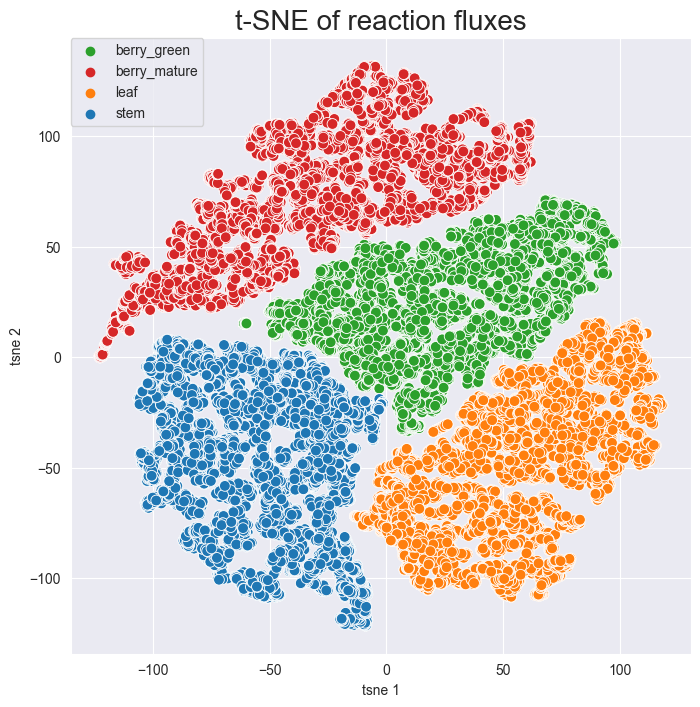

In [38]:
# df_tsne_final = run_tsne(n_components=2, data=df_pca_final_scaled)
# df_tsne_final['factor'] = ['berry_green'] * 10000 + ['berry_mature'] * 10000 + ['leaf'] * 10000 + ['stem'] * 10000
plot_tsne(data=df_tsne_final, name_fig='tsne_fluxes_final', title='t-SNE of reaction fluxes')

In [4]:
df_berries = df_sampling_final.iloc[:20000, :]

In [5]:
scaler = StandardScaler()
scaled_final = scaler.fit_transform(df_berries)
df_berries_scaled = pd.DataFrame(scaled_final, columns=df_berries.columns, index=df_berries.index)

In [6]:
from sklearn.feature_selection import SelectPercentile, f_classif, SelectKBest
import matplotlib.pyplot as plt

In [8]:
selector = SelectKBest(f_classif, k=50)

In [9]:
factor = ['berry_green'] * 10000 + ['berry_mature'] * 10000

In [10]:
data_array = selector.fit_transform(df_berries_scaled, factor)

cols = selector.get_support(indices=True)

diff_reacs = df_berries_scaled.iloc[:, cols].columns
print(diff_reacs)

# new_data = pd.DataFrame(data_array, index=df_berries_scaled.index, columns=df_berries_scaled.iloc[:, cols].columns)

C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   9   11   14 ... 6669 6670 6671] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\BiSBII\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['RXN-21527__chlo', 'RXN-7815__cyto', 'TR2000091__mito__cyto',
       'TI0000709__vacu__cyto', 'TI1000048__vacu__cyto',
       'TI0003845__vacu__cyto', 'TO0000190__cyto__extr',
       'GSAAMINOTRANS-RXN__chlo', 'GLUTRNAREDUCT-RXN__chlo', 'GLURS-RXN__chlo',
       'TO0003845__vacu__cyto', 'RXN-21524__chlo', 'TO1000448__cyto__extr',
       'RXN-21523__chlo', 'TO2903028__mito__cyto', 'TR2900072__mito__cyto',
       'TO0000023__mito__cyto', 'TO1000048__cyto__extr',
       'TO1000048__vacu__cyto', 'RXN-21526__chlo', 'UROGENDECARBOX-RXN__chlo',
       'RXN-13822__cyto', 'TR2000130__mito__cyto', 'TO1000190__cyto__extr',
       'TO1000242__vacu__cyto', 'PORPHOBILSYNTH-RXN__chlo', 'RXN-9282__mito',
       'TI1000242__vacu__cyto', 'RXN-9285__mito', 'TO0000048__cyto__extr',
       'RXN-9279__mito', 'TO0011677__cyto__extr', 'RXN-21525__chlo',
       'UROGENIIISYN-RXN__chlo', 'TO0011423__cyto__extr',
       '3PGAREARR-RXN__chlo', '3PGAREARR-RXN__cyto', 'TO1000076__cyto__extr',
       'TR00002